[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


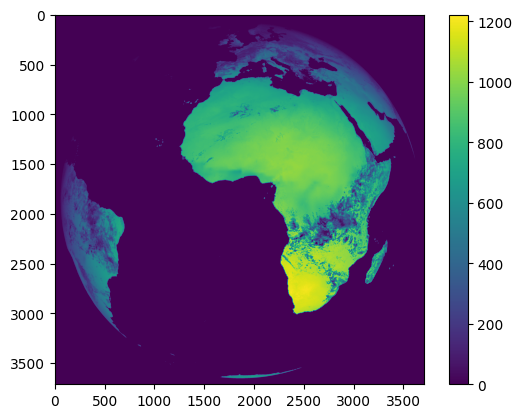

In [10]:
#%matplotlib notebook
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
import h5py
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import pyproj
# scipy-directory, interpolator-file inside directory, RegularGridInterpolator is a class in that file
import matplotlib.pyplot as plt
#Open the HDF5 file
#filefmt = 'data/1_{ts:%Y%m%d}/HDF5_LSASAF_MSG_MDSSFTD_MSG-Disk_{ts:%Y%m%d%H%M}.hdf
#for dt in dts:
#   filename = filefmt.format(ts=dt.item())
filename = 'LSA_SAF/1_20200127/HDF5_LSASAF_MSG_MDSSFTD_MSG-Disk_202001271130.hdf'
with h5py.File(filename, 'r') as  file:
    # Access the value of 'NOMINAL_LAT' attribute
    nominal_lat = file.attrs['NOMINAL_LAT']
    nominal_long = file.attrs['NOMINAL_LONG']
    dssf_tot=file['DSSF_TOT'][:]
    dfraction=file['FRACTION_DIFFUSE'][:]
    # print(file['DSSF_TOT'].attrs['OFFSET'])
    # print(file['DSSF_TOT'].attrs['SCALING_FACTOR'])
    # print(file['DSSF_TOT'].attrs['UNITS'])
    # print(list(file.attrs.keys()))
    # print(list(file['DSSF_TOT'].attrs.keys()))
    #print(list(file['Z_ANCILLARY'].attrs.keys()))
    #ncols=file['DSSF_TOT'].attrs['N_COLS']

print(dfraction)
 # Print the value
# print(nominal_lat)
# print(nominal_long)
#f['Folder'].attrs['<name of the attribute>']
# breakpoint()
# nanmax to print max value excluding NaN
# print(np.nanmax(dssf_tot))
# print(np.nanmin(dssf_tot))
# to plot
plt.imshow(dssf_tot/10.0)
plt.colorbar()
plt.show()
#print(ncols)

#regular grid interpolation
pixel_size = [
        3.1 * 1000,
        3.1 * 1000
    ]
left = -pixel_size[0] * (dssf_tot.shape[0] / 2 + 0.5)
right = pixel_size[0] * (dssf_tot.shape[0] / 2 - 0.5)
bottom = -pixel_size[1] * (dssf_tot.shape[1] / 2 - 0.5)
top = pixel_size[1] * (dssf_tot.shape[1] / 2 + 0.5)



Xd = np.linspace(left, right, 3712)
#starting from negative(left) to positive(right)
Yd = np.linspace(bottom, top, 3712)

i = RegularGridInterpolator(
       [Xd, Yd], dssf_tot, bounds_error=False, fill_value=np.nan
        )

satellite_height = 35785863.0
lon0 =0
# crs to get what satellite sees. the area of earth covered
geos = pyproj.CRS.from_proj4(

    '+proj=geos +h={} +lon_0={}'.format(satellite_height, lon0)

)

#geodetic normal lat and long and geostationary(center is nadir point(satellite nom lat and long)
p = pyproj.Transformer.from_crs(geos.geodetic_crs, geos)


Xg, Yg = p.transform(52.2100, 14.1220)
di = i(np.dstack([Yg, Xg]))

data = di/10.0

# print(di/10.0)

In [1]:
import h5py
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import pyproj
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_sol_castt(file_name):
    #Open the HDF5 file
    filename = file_name
    with h5py.File(filename, 'r') as  file:
        # Access the value of 'NOMINAL_LAT' attribute
        nominal_lat = file.attrs['NOMINAL_LAT']
        nominal_long = file.attrs['NOMINAL_LONG']
        dssf_tot=file['DSSF_TOT'][:]
        dfraction=file['FRACTION_DIFFUSE'][:]

    #regular grid interpolation
    pixel_size = [
            3.1 * 1000,
            3.1 * 1000
        ]
    left = -pixel_size[0] * (dssf_tot.shape[0] / 2 + 0.5)
    right = pixel_size[0] * (dssf_tot.shape[0] / 2 - 0.5)
    bottom = -pixel_size[1] * (dssf_tot.shape[1] / 2 - 0.5)
    top = pixel_size[1] * (dssf_tot.shape[1] / 2 + 0.5)



    Xd = np.linspace(left, right, 3712)
    #starting from negative(left) to positive(right)
    Yd = np.linspace(bottom, top, 3712)

    i = RegularGridInterpolator(
        [Xd, Yd], dssf_tot, bounds_error=False, fill_value=np.nan
            )

    satellite_height = 35785863.0
    lon0 =0
    # crs to get what satellite sees. the area of earth covered
    geos = pyproj.CRS.from_proj4(

        '+proj=geos +h={} +lon_0={}'.format(satellite_height, lon0)

    )

    #geodetic normal lat and long and geostationary(center is nadir point(satellite nom lat and long)
    p = pyproj.Transformer.from_crs(geos.geodetic_crs, geos)


    Xg, Yg = p.transform(52.2100, 14.1220)
    di = i(np.dstack([Yg, Xg]))

    x = di/10.0
    data = x.item()
    # print(data)
    return data

In [ ]:
def read_sol_cast(file_name,lat,long):
    #Open the HDF5 file
    filename = file_name
    with h5py.File(filename, 'r') as  file:
        # Access the value of 'NOMINAL_LAT' attribute
        nominal_lat = file.attrs['NOMINAL_LAT']
        nominal_long = file.attrs['NOMINAL_LONG']
        dssf_tot=file['DSSF_TOT'][:]
        dfraction=file['FRACTION_DIFFUSE'][:]

    #regular grid interpolation
    pixel_size = [
            3.1 * 1000,
            3.1 * 1000
        ]
    left = -pixel_size[0] * (dssf_tot.shape[0] / 2 + 0.5)
    right = pixel_size[0] * (dssf_tot.shape[0] / 2 - 0.5)
    bottom = -pixel_size[1] * (dssf_tot.shape[1] / 2 - 0.5)
    top = pixel_size[1] * (dssf_tot.shape[1] / 2 + 0.5)



    Xd = np.linspace(left, right, 3712)
    #starting from negative(left) to positive(right)
    Yd = np.linspace(bottom, top, 3712)

    i = RegularGridInterpolator(
        [Xd, Yd], dssf_tot, bounds_error=False, fill_value=np.nan
            )

    satellite_height = 35785863.0
    lon0 =0
    # crs to get what satellite sees. the area of earth covered
    geos = pyproj.CRS.from_proj4(

        '+proj=geos +h={} +lon_0={}'.format(satellite_height, lon0)

    )

    #geodetic normal lat and long and geostationary(center is nadir point(satellite nom lat and long)
    p = pyproj.Transformer.from_crs(geos.geodetic_crs, geos)


    Xg, Yg = p.transform(lat, long)
    di = i(np.dstack([Yg, Xg]))

    x = di/10.0
    data = x.item()
    # print(data)
    return data

In [3]:
dts_1 = np.datetime64('2020-01-27') + np.arange(96) * np.timedelta64(15, 'm')
dts_2 = np.datetime64('2020-02-05') + np.arange(96) * np.timedelta64(15, 'm')
dts_3 = np.datetime64('2020-02-18') + np.arange(96) * np.timedelta64(15, 'm')
dts_4 = np.datetime64('2020-04-01') + np.arange(96) * np.timedelta64(15, 'm')
dts_5 = np.datetime64('2020-04-13') + np.arange(96) * np.timedelta64(15, 'm')
dts_6 = np.datetime64('2020-05-25') + np.arange(96) * np.timedelta64(15, 'm')
dts_7 = np.datetime64('2020-07-09') + np.arange(96) * np.timedelta64(15, 'm')
dts_8 = np.datetime64('2020-07-20') + np.arange(96) * np.timedelta64(15, 'm')
dts_9 = np.datetime64('2020-08-10') + np.arange(96) * np.timedelta64(15, 'm')
dts_10 = np.datetime64('2020-09-21') + np.arange(96) * np.timedelta64(15, 'm')
dts_11 = np.datetime64('2020-09-24') + np.arange(96) * np.timedelta64(15, 'm')
dts_12 = np.datetime64('2020-10-03') + np.arange(96) * np.timedelta64(15, 'm')

list = []
list.append(dts_1)
list.append(dts_2)
list.append(dts_3)
list.append(dts_4)
list.append(dts_5)
list.append(dts_6)
list.append(dts_7)
list.append(dts_8)
list.append(dts_9)
list.append(dts_10)
list.append(dts_11)
list.append(dts_12)

print(list)
# jjjj = np.array()
# dts = np.vstack
print('\n')

print(dts_1)

[array(['2020-01-27T00:00', '2020-01-27T00:15', '2020-01-27T00:30',
       '2020-01-27T00:45', '2020-01-27T01:00', '2020-01-27T01:15',
       '2020-01-27T01:30', '2020-01-27T01:45', '2020-01-27T02:00',
       '2020-01-27T02:15', '2020-01-27T02:30', '2020-01-27T02:45',
       '2020-01-27T03:00', '2020-01-27T03:15', '2020-01-27T03:30',
       '2020-01-27T03:45', '2020-01-27T04:00', '2020-01-27T04:15',
       '2020-01-27T04:30', '2020-01-27T04:45', '2020-01-27T05:00',
       '2020-01-27T05:15', '2020-01-27T05:30', '2020-01-27T05:45',
       '2020-01-27T06:00', '2020-01-27T06:15', '2020-01-27T06:30',
       '2020-01-27T06:45', '2020-01-27T07:00', '2020-01-27T07:15',
       '2020-01-27T07:30', '2020-01-27T07:45', '2020-01-27T08:00',
       '2020-01-27T08:15', '2020-01-27T08:30', '2020-01-27T08:45',
       '2020-01-27T09:00', '2020-01-27T09:15', '2020-01-27T09:30',
       '2020-01-27T09:45', '2020-01-27T10:00', '2020-01-27T10:15',
       '2020-01-27T10:30', '2020-01-27T10:45', '2020-01-27T11

In [10]:
# arr = []
del arr
data = []
filefmt = 'LSA_SAF/{num}_{ts:%Y%m%d}/HDF5_LSASAF_MSG_MDSSFTD_MSG-Disk_{ts:%Y%m%d%H%M}.hdf'
for idx,i in enumerate(list):
   # print(i)
   for dt in i:
      try:
         filename = filefmt.format(ts=dt.item(), num=idx+1)
         data.append(read_sol_cast(filename,lat,long))
      except:
         data.append(np.nan)
   
   if 'arr' not in locals():
      arr = np.array(data)
      print(arr.shape)
   else:
      # if len(data) == 0:
      #    break
      print(len(data))
      arr = np.vstack((arr,data))
      print(arr.shape)
   data=[]

#print(data)

(96,)
96
(2, 96)
96
(3, 96)
96
(4, 96)
96
(5, 96)
96
(6, 96)
96
(7, 96)
96
(8, 96)
96
(9, 96)
96
(10, 96)
96
(11, 96)
96
(12, 96)


In [12]:
print(arr)
filepath = 'my_excel_filee.csv'
np.savetxt(filepath, arr, delimiter=",")

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [nan nan nan ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
plt.plot()